**Función de Códigos**
1. import sys

Importa el módulo sys para acceder a variables y funciones del sistema.

2. import warnings

Importa el módulo warnings para controlar advertencias en Python.

3. if not sys.warnoptions:

Verifica si no se han establecido opciones de advertencia en el sistema.

4. warnings.simplefilter('ignore')

Si no hay opciones de advertencia definidas, configura el filtro de advertencias en "ignore," lo que suprime todas las advertencias en la salida del programa.

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

**Utilidad de los paquetes**
1. import tensorflow as tf      :Modelado predictivo y análisis de datos

2. import numpy as np   :Análisis y manipulación de datos

3. import matplotlib.pyplot as plt  :Visualización de datos

4. import seaborn as sns    :Visualización de datos

5. import pandas as pd	:Análisis y manipulación de datos

6. from datetime import datetime    :Preprocesamiento de datos

7. from datetime import timedelta   :Manipulación de series de tiempo

8. from tqdm import tqdm	:Visualización de progreso

9. sns.set()	:Visualización de progreso

10. tf.compat.v1.random.set_random_seed(1234)	:Modelado predictivo

**Función de los códigos**
1. import tensorflow as tf      :Importa TensorFlow para construir y entrenar modelos de aprendizaje automático.

2. import numpy as np   :Importa NumPy para trabajar con estructuras de datos numéricos y operaciones matemáticas.

3. import matplotlib.pyplot as plt  :Importa Matplotlib para crear gráficos y visualizaciones.

4. import seaborn as sns    :Importa Seaborn para crear gráficos estadísticos estilizados.

5. import pandas as pd	:Importa Pandas para trabajar con estructuras de datos y realizar análisis de datos.

6. from datetime import datetime    :Importa datetime para trabajar con fechas y horas.

7. from datetime import timedelta   :Importa timedelta para representar diferencias entre fechas y horas

8. from tqdm import tqdm	:Importa tqdm para crear barras de progreso interactivas en bucles y operaciones largas.

9. sns.set()	:Establece la apariencia predeterminada de los gráficos de Seaborn.

10. tf.compat.v1.random.set_random_seed(1234)	:Establece una semilla para la generación de números aleatorios en TensorFlow para la reproducibilidad de los resultados.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

**Utilidad de los paquetes**

1. df = pd.read_csv('GOOG.csv')     :   Análisis y manipulación de datos

2. df.head()	    :          Análisis y manipulación de datos

**Función de los códigos**

1. df = pd.read_csv('GOOG.csv')     :   Lee un archivo CSV ('GOOG.csv') y carga los datos en un DataFrame de Pandas para su análisis y manipulación.

2. df.head()	    :          Muestra las primeras filas del DataFrame para inspeccionar los datos y verificar su estructura.

In [4]:
df = pd.read_csv('GOOG.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-17,99.519997,101.769997,99.510002,100.779999,100.779999,23311600
1,2022-10-18,103.940002,104.220001,100.650002,101.389999,101.389999,21610500
2,2022-10-19,100.699997,101.658997,99.635002,100.290001,100.290001,21573700
3,2022-10-20,100.820000,103.000000,99.970001,100.529999,100.529999,25125100
4,2022-10-21,98.459999,101.620003,98.230003,101.480003,101.480003,28988700


**Utilidad de los paquetes**

1. minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32'))     :     Preparación de datos

2. df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')	    :   Preparación de datos

3. df_log = pd.DataFrame(df_log)        :   Análisis y manipulación de datos

4. df_log.head()	:   Análisis y manipulación de datos

**Función de los códigos**

1. minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32'))     :     Escala las observaciones de la columna "Close index" (precios de cierre) a un rango de 0 a 1 utilizando el escalador MinMax.

2. df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')	    :   Aplica la transformación MinMax a los datos de la columna "Close index" y los almacena en la variable df_log.

3. df_log = pd.DataFrame(df_log)        :   Convierte los datos transformados en un DataFrame de Pandas para su análisis y manipulación.

4. df_log.head()	:    Muestra las primeras filas del DataFrame df_log para inspeccionar los datos escalados.

In [5]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.297028
1,0.307507
2,0.288610
3,0.292733
4,0.309054


## Split train and test

I will cut the dataset to train and test datasets,

1. Train dataset derived from starting timestamp until last 30 days
2. Test dataset derived from last 30 days until end of the dataset

So we will let the model do forecasting based on last 30 days, and we will going to repeat the experiment for 10 times. You can increase it locally if you want, and tuning parameters will help you by a lot.

**Utilidad de los paquetes**

1. df_train = df_log.iloc[:-test_size]      :   Preparación de datos

2. df_test = df_log.iloc[-test_size:]	    :   Preparación de datos

3. df.shape, df_train.shape, df_test.shape	    :   Análisis y manipulación de datos

**Función de los códigos**

1. df_train = df_log.iloc[:-test_size]      :   Crea un DataFrame df_train que contiene los datos de entrenamiento, excluyendo las últimas test_size filas de df_log.

2. df_test = df_log.iloc[-test_size:]	    :   Crea un DataFrame df_test que contiene los datos de prueba, tomando las últimas test_size filas de df_log.

3. df.shape, df_train.shape, df_test.shape	    :   Proporciona información sobre las dimensiones de los DataFrames, lo que es útil para verificar la conformidad de los datos de entrenamiento y prueba.


In [6]:
test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df.shape, df_train.shape, df_test.shape

((250, 7), (220, 1), (30, 1))

**Utilidad de los paquetes**
1. class Model	:   Modelo de red neuronal recurrente (RNN)

2. calculate_accuracy	:   Predicción de la precisión del modelo

3. anchor : Suavizado de una serie de tiempo


**Función econométrica**
1. class Model	:   Definición de un modelo de red neuronal recurrente para procesamiento de secuencias de tiempo.

2. calculate_accuracy	:   Cálculo de la precisión del modelo en comparación con los valores reales.

3. anchor : Aplicación de un suavizado exponencial a una serie de tiempo para reducir el ruido.

**Dato extra**
1.  Se está utilizando la función 'tf.nn.rnn_cell.GRUCell(size_layer)' para crear la celda GRU

El código define una función que simplifica la creación de una celda GRU con un tamaño específico en una red neuronal recurrente. Esto facilita la configuración y la construcción de modelos RNN que utilizan celdas GRU para tareas de análisis de secuencias, como pronósticos en series temporales y procesamiento de lenguaje natural.

In [7]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.GRUCell(size_layer)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * size_layer)
        )
        _, last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )

        with tf.variable_scope('decoder', reuse = False):
            rnn_cells_dec = tf.nn.rnn_cell.MultiRNNCell(
                [lstm_cell(size_layer) for _ in range(num_layers)], state_is_tuple = False
            )
            drop_dec = tf.contrib.rnn.DropoutWrapper(
                rnn_cells_dec, output_keep_prob = forget_bias
            )
            self.outputs, self.last_state = tf.nn.dynamic_rnn(
                drop_dec, self.X, initial_state = last_state, dtype = tf.float32
            )

        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )

def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

Estos valores son simplemente hiperparámetros y variables utilizados en un modelo de redes neuronales recurrentes (RNN) para series de tiempo, y no se pueden describir con utilidad económica ni función, ya que no representan una acción específica en términos de análisis econométrico.

In [8]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

**Función del código**

1. def forecast():	Definición de la función forecast().

2. tf.reset_default_graph()	:   Reinicia el grafo predeterminado de TensorFlow.

3. modelnn = Model(...)	:   Creación de una instancia del modelo Model.

4. sess = tf.InteractiveSession(): Inicialización de una sesión interactiva de TensorFlow.

5. date_ori = pd.to_datetime(df.iloc[:, 0]).tolist(): Conversión de la primera columna del DataFrame a fechas y almacenamiento en date_ori.

6. pbar = tqdm(range(epoch), desc='train loop')	:Creación de una barra de progreso para el bucle de entrenamiento.

7. for i in pbar: Inicio del bucle de entrenamiento.

8. init_value_forward = np.zeros(...): Inicialización de valores de estado para la capa RNN.

9. total_loss, total_acc = [], []	Creación de listas para almacenar pérdidas y precisiones.

10. output_predict = minmax.inverse_transform(...)	: Inversión de la transformación de los datos.

11. deep_future = anchor(output_predict[:, 0], 0.3)	: Aplicación de una función de anclaje a las predicciones.

12. return deep_future[-test_size:]	: Devolución de las predicciones finales correspondientes al conjunto de prueba.

**Interpretación econométrica**

En términos econométricos, esta función representa el proceso de construcción, entrenamiento y evaluación de un modelo de pronóstico basado en redes neuronales. Se utiliza para generar predicciones futuras sobre una serie temporal específica y se aplica un proceso de posprocesamiento para mejorar la interpretación de los resultados. Este enfoque es valioso en el análisis económico y financiero para prever tendencias y tomar decisiones informadas basadas en el comportamiento pasado de los datos.

**Dato extra**
1. La inicialización de init_valuecon una matriz de ceros es común en modelos de series temporales para representar un estado inicial en el que no se tiene información previa sobre la serie

2. init_value = np.zeros((1, num_layers * size_layer)) inicializa una variable llamada init_valuecon una matriz de ceros. Esta matriz se utiliza para almacenar información sobre el estado oculto del modelo en cada paso del bucle de entrenamiento.



In [9]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))

    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state

    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)

    return deep_future[-test_size:]

**Función de códigos**

forecast:

Esta función parece estar diseñada para inicializar un modelo de pronóstico. Aquí se resumen los pasos clave:
Crea una instancia de un modelo específico llamado modelnncon varios parámetros, como tasa de aprendizaje ( learning_rate), número de capas ( num_layers), dimensiones de entrada y salida ( df_log.shape[1]), tamaño de capa ( size_layer), y tasa de abandono ( dropout_rate).
Inicializa una sesión interactiva de TensorFlow ( tf.InteractiveSession()).

**Interpretación econométrica**

La inicialización de la sesión interactiva de TensorFlow permite una interacción flexible con el modelo y los datos, lo que facilita el ajuste y la evaluación del modelo en tiempo real. El modelo en sí puede ser utilizado para aprender patrones complejos en los datos y realizar predicciones basadas en estos patrones, lo que puede proporcionar información valiosa para la toma de decisiones económicas y financieras

In [11]:
def forecast():
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()

**Función de los códigos**

1. accuracies = [calculate_accuracy(...) : Cálculo de la precisión de las predicciones en results en comparación con los valores verdaderos de df['Close'] correspondientes al conjunto de prueba.

2. plt.figure(figsize=(15, 5))	: Creación de una figura de Matplotlib con un tamaño específico.

3. for no, r in enumerate(results):	Inicio de un bucle para enumerar y trazar las predicciones en results.

4. plt.plot(r, label='forecast %d'%(no + 1)) : Trama de las predicciones del modelo, etiquetadas con números crecientes.

5. plt.plot(df['Close'].iloc[-test_size:].values, label='true trend', c='black') : Trama de la tendencia verdadera (true trend) del conjunto de prueba en color negro.

6. plt.legend()	: Agregación de una leyenda a la figura que muestra las etiquetas de las predicciones y la tendencia verdadera.

7. plt.title('average accuracy: %.4f'%(np.mean(accuracies))	: Agregación de un título a la figura que muestra la precisión promedio de las predicciones.

8. plt.show() : Muestra la figura con las tramas y la leyenda.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


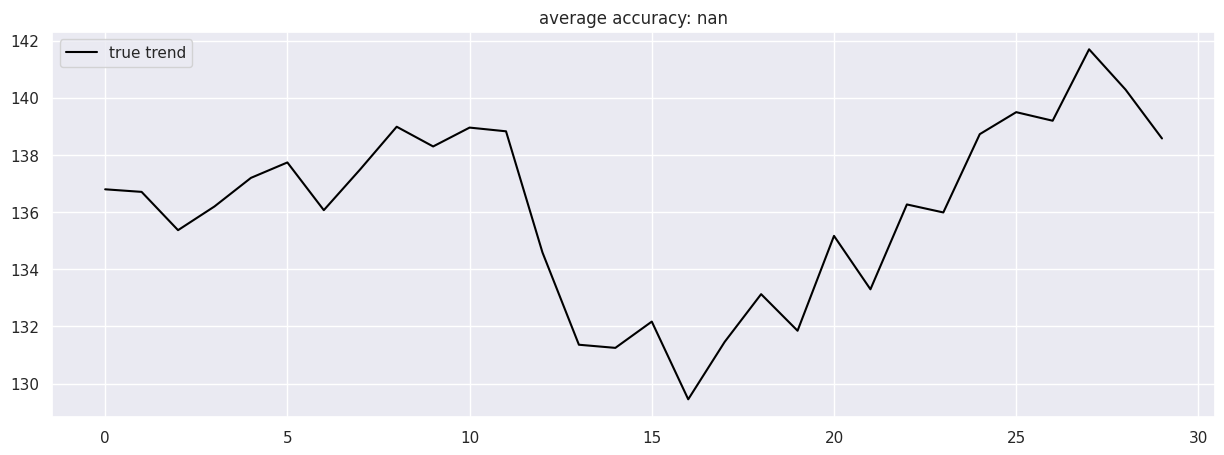

In [12]:
accuracies = [calculate_accuracy(df['Close'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df['Close'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()

**Interpretación econométrica**

1. Este gráfico es una representación visual del rendimiento del modelo de pronósticos en comparación con los datos económicos reales. La línea negra representa la verdadera tendencia de la variable económica.
2. La oscilación entre 142 y 130 sugiere que la variable económica está experimentando fluctuaciones en su valor a lo largo del tiempo. En el análisis financiero, la volatilidad puede ser importante para medir el riesgo y la incertidumbre.
3. Para un análisis más profundo, es importante determinar si la oscilación de la línea negra sigue algún patrón o tendencia a largo plazo. ¿Hay una tendencia alcista o bajista a pesar de las fluctuaciones a corto plazo?